In [1]:
import six

In [2]:
%load_ext autoreload
%autoreload 2


import anchor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=20))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-21 16:39:14	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-02-21 16:39:14	Parsing datapackage to create a Study object
2016-02-21 16:39:49	Initializing Study
2016-02-21 16:39:49	Initializing Predictor configuration manager for Study
2016-02-21 16:39:49	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-21 16:39:49	Added ExtraTreesClassifier to default predictors
2016-02-21 16:39:49	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-21 16:39:49	Added ExtraTreesRegressor to default predictors
2016-02-21 16:39:49	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-21 16:39:49	Added GradientBoostingClassifier to default predictors
2016-02-21 16:39:49	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [3]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
!mkdir $folder


figure_folder = '{}/smarce1_correlations'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian': File exists
mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/smarce1_correlations': File exists


In [4]:
bimodal_psis = []

In [5]:
psi_grouped = psi_filtered.groupby(study.sample_id_to_phenotype)

for (phenotype, modality), df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    if modality == 'bimodal':
        psi_phenotype = psi_grouped.get_group(phenotype)
        psi_subset = psi_phenotype[df['event_id']]
        six.print_(phenotype, psi_subset.shape)
        bimodal_psis.append(psi_subset)
bimodal_psi = pd.concat(bimodal_psis)
six.print_(bimodal_psi.shape)
bimodal_psi.head()

MN (56, 390)
NPC (67, 799)
iPSC (58, 1383)
(181, 2153)


,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020785:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+,exon:chr10:103563492-103563776:-@exon:chr10:103559999-103560157:-@exon:chr10:103558599-103559212:-,exon:chr10:103567487-103567658:-@exon:chr10:103565802-103565900:-@exon:chr10:103563492-103563776:-,exon:chr10:104209950-104210087:+@exon:chr10:104211156-104211312:+@exon:chr10:104215094-104215184:+,exon:chr10:104262357-104262411:-@exon:chr10:104250306-104250370:-@exon:chr10:104248820-104248895:-,...,exon:chrX:64744845-64744930:-@exon:chrX:64744444-64744494:-@exon:chrX:64743936-64744142:-,exon:chrX:64749092-64749138:-@exon:chrX:64748140-64748249:-@exon:chrX:64744845-64744930:-,exon:chrX:69354373-69354666:+@exon:chrX:69366483-69366678:+@exon:chrX:69368611-69368690:+,exon:chrX:69509710-69509763:-@exon:chrX:69509372-69509443:-@exon:chrX:69509105-69509204:-,exon:chrX:70503544-70503571:+@exon:chrX:70504247-70504303:+@exon:chrX:70510479-70510641:+,exon:chrX:75395308-75395448:+@exon:chrX:75396716-75396827:+@exon:chrX:75397451-75398039:+,exon:chrX:76952065-76952192:-@exon:chrX:76949313-76949426:-@exon:chrX:76944311-76944420:-,exon:chrX:77041468-77041702:-@exon:chrX:76972608-76972720:-@exon:chrX:76954062-76954117:-,exon:chrX:78622602-78622815:-@exon:chrX:78618920-78619051:-@exon:chrX:78618439-78618636:-,exon:chrY:14813969-14813984:+@exon:chrY:14820567-14820626:+@exon:chrY:14821321-14821476:+
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_02,NaN,NaN,NaN,NaN,0,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1.000000,NaN,NaN,NaN,0
M1_05,NaN,NaN,NaN,NaN,0,1,1,NaN,0,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
M1_06,NaN,NaN,NaN,NaN,0,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0.352518,NaN,NaN,NaN,0
M1_07,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,0


In [6]:
bimodal_correlations = bimodal_psi.groupby(study.sample_id_to_phenotype).corr()

In [7]:
bimodal_correlations_tidy = bimodal_correlations.stack()
bimodal_correlations_tidy = bimodal_correlations_tidy.reset_index()
bimodal_correlations_tidy = bimodal_correlations_tidy.rename(columns={'level_1': 'event_id1', 'level_2': 'event_id2', 
                                                                      0: 'Pearson $R$'})
not_self_correl = bimodal_correlations_tidy['event_id1'] != bimodal_correlations_tidy['event_id2']
six.print_(bimodal_correlations_tidy.shape)
bimodal_correlations_tidy = bimodal_correlations_tidy.loc[not_self_correl]
six.print_(bimodal_correlations_tidy.shape)
bimodal_correlations_tidy.head()

(1955774, 4)
(1953202, 4)


,phenotype,event_id1,event_id2,Pearson $R$
1,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,exon:chr10:1094804-1094875:-@exon:chr10:108993...,-0.597410
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,exon:chr10:127512179-127512291:+@exon:chr10:12...,0.083333
3,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,exon:chr10:38299627-38299711:+@exon:chr10:3830...,0.111111
4,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,exon:chr10:70161377-70161494:-@exon:chr10:7015...,-0.342588
5,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,exon:chr10:7844721-7844817:+@exon:chr10:784893...,0.109220


In [8]:
sns.set(style='ticks', context='paper')

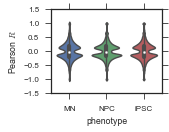

In [9]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.violinplot(x='phenotype', y='Pearson $R$', data=bimodal_correlations_tidy)

In [10]:
psi_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations/psi'

dfs = []

# for csv in glob.glob('{}/*.csv'.format(psi_folder)):
for i in range(1, 2):
    csv = '{}/iteration_{}.csv'.format(psi_folder, str(i).zfill(4))
    psi = pd.read_csv(csv, index_col=0)
    correlations = psi.groupby(study.sample_id_to_phenotype).corr()
    tidy = correlations.stack()
    tidy = tidy.reset_index()
    tidy = tidy.rename(columns={'level_1': 'event_id1', 
                                'level_2': 'event_id2', 
                                0: 'Pearson $R$'})
    not_self_correl = tidy['event_id1'] != tidy['event_id2']
#     six.print_(tidy.shape)
    tidy = tidy.loc[not_self_correl]
    six.print_(tidy.shape)
    dfs.append(tidy)
random_correlations = pd.concat(dfs)
random_correlations.head()

(137697935, 4)
(137673856, 4)


,phenotype,event_id1,event_id2,Pearson $R$
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:101507014-101507147:+@exon:chr10:10...,1.000000
2,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:102003455-102003529:-@exon:chr10:10...,-0.333333
3,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:103348089-103348157:+@exon:chr10:10...,-1.000000
4,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:1034402-1034467:+@exon:chr10:103842...,0.316228
5,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:103919653-103919781:+@exon:chr10:10...,-1.000000


In [11]:
random_correlations['data_type'] = 'Permuted'

In [13]:
bimodal_correlations_tidy['data_type'] = 'Actual'

In [14]:
tidy_correlations = pd.concat([random_correlations, bimodal_correlations_tidy])
tidy_correlations.head()

,phenotype,event_id1,event_id2,Pearson $R$,data_type
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:101507014-101507147:+@exon:chr10:10...,1.000000,Permuted
2,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:102003455-102003529:-@exon:chr10:10...,-0.333333,Permuted
3,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:103348089-103348157:+@exon:chr10:10...,-1.000000,Permuted
4,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:1034402-1034467:+@exon:chr10:103842...,0.316228,Permuted
5,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,exon:chr10:103919653-103919781:+@exon:chr10:10...,-1.000000,Permuted


Traceback (most recent call last):
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 300, in wrapped
    return f(*args, **kwargs)
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 345, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/home/obotvinnik/anaconda/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/home/obotvinnik/anaconda/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/home/obotvinnik/anaconda/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

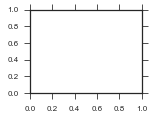

In [15]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.violinplot(x='phenotype', y='Pearson $R$', hue='data_type', data=tidy_correlations)

In [17]:
sns.distplot?

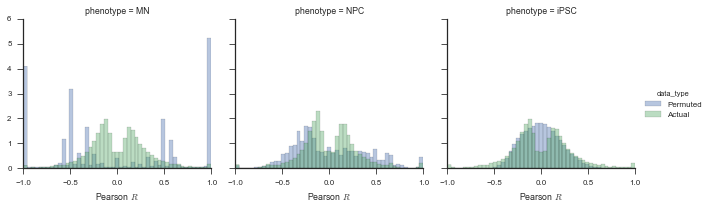

In [18]:
g = sns.FacetGrid(tidy_correlations, col='phenotype', hue='data_type', size=2)
g.map(sns.distplot, 'Pearson $R$', kde=False, bins=np.linspace(-1, 1, 50), norm_hist=True)
g.add_legend()

In [ ]:
bimodal_correlations

In [22]:
# bimodal_correlations = 

In [24]:
modalities_gene_names = study.supplemental.modalities_tidy.join(study.splicing.feature_data.gene_name, on='event_id')

In [25]:
modalities_gene_names.head()

,phenotype,event_id,modality,gene_name
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,SCD
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,"SEC31B,NDUFB8"
2,MN,exon:chr10:103348089-103348157:+@exon:chr10:10...,included,DPCD
3,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,DPCD
4,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,DPCD


In [27]:
smarce1_bimodal_events = modalities_gene_names['event_id'].loc[(modalities_gene_names.gene_name == 'SMARCE1') 
                                     & (modalities_gene_names.modality == 'bimodal')]

In [33]:
folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations/'

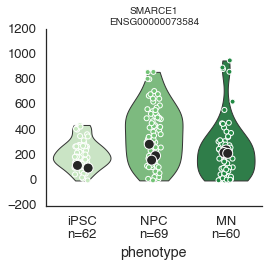

In [13]:
study.plot_gene('SMARCE1', sample_subset='~outlier')
fig = plt.gcf()
fig.savefig('{}/smarce1_expression.pdf'.format(figure_folder))

SMARCE1-kD influenced genes:

- CHRM4
- L1CAM

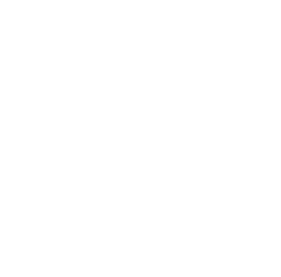

In [29]:
study.plot_gene("CHRM4")

In [30]:
sns.set(context='talk', style='ticks')

In [31]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/smarce1_correlations'

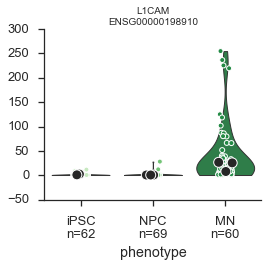

In [32]:
study.plot_gene('L1CAM', sample_subset='~outlier')
fig = plt.gcf()
fig.savefig('{}/l1cam_expression.pdf'.format(figure_folder))

In [65]:
smarce1_bimodal_events.values

array([ 'exon:chr17:38801828-38801871:-@exon:chr17:38798707-38798811:-@exon:chr17:38793744-38793824:-',
       'exon:chr17:38802048-38802099:-@exon:chr17:38801828-38801871:-@exon:chr17:38793744-38793824:-'], dtype=object)

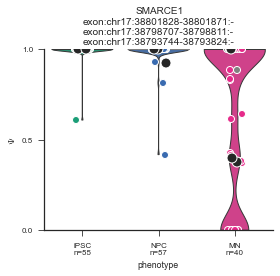

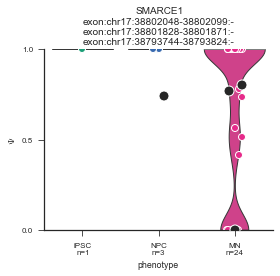

In [66]:
for event in smarce1_bimodal_events:
    study.plot_event(event)

In [38]:
study.splicing.maybe_renamed_to_feature_id('SNAP25')

Index([u'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10277573-10277698:+', u'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'], dtype='object')

In [20]:
smarce1_event = 'exon:chr17:38801828-38801871:-@exon:chr17:38798707-38798811:-@exon:chr17:38793744-38793824:-'
snap25_event = u'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'

In [24]:
smarce1 = study.splicing.data[smarce1_event].dropna()

data, smarce1 = study.expression.data.align(smarce1, join='inner', axis=0)
six.print_('data.shape', data.shape)
six.print_('smarce1.shape', smarce1.shape)

data.shape (160, 16028)
smarce1.shape (160,)


In [27]:
smarce1_gene_correls = data.corrwith(smarce1)
smarce1_gene_correls

ENSG00000000003    0.117340
ENSG00000000419    0.102455
ENSG00000000457    0.097154
ENSG00000000460    0.117906
ENSG00000001036    0.124074
ENSG00000001084    0.087549
ENSG00000001167    0.081608
ENSG00000001460    0.100907
ENSG00000001461   -0.017922
ENSG00000001497    0.073941
ENSG00000001629   -0.189169
ENSG00000001630   -0.066161
ENSG00000001631   -0.004035
ENSG00000002016    0.006294
ENSG00000002330   -0.183984
ENSG00000002549    0.160173
ENSG00000002586    0.171942
ENSG00000002746   -0.041655
ENSG00000002834   -0.262258
ENSG00000002919    0.034557
ENSG00000003056    0.227112
ENSG00000003096   -0.026450
ENSG00000003147   -0.136538
ENSG00000003249   -0.036453
ENSG00000003393   -0.121651
ENSG00000003400    0.058377
ENSG00000003402    0.017785
ENSG00000003436    0.105284
ENSG00000003509   -0.140037
ENSG00000003756   -0.172591
                     ...   
ENSG00000273356   -0.257110
ENSG00000273372   -0.271217
ENSG00000273382    0.003140
ENSG00000273398    0.106534
ENSG00000273409   -0

In [183]:
l1cam_ensembl = study.expression.maybe_renamed_to_feature_id("L1CAM")[0]

In [184]:
smarce1_gene_correls[l1cam_ensembl]

-0.46720077103935076

In [185]:
smarce1_gene_correls[rbfox1_ensembl]

-0.50809340114538559

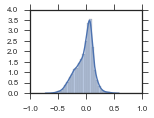

In [28]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.distplot(smarce1_gene_correls, bins=np.linspace(-1, 1, 50))

In [187]:
negatively_correlated = smarce1_gene_correls[smarce1_gene_correls < -.4]
negatively_correlated.shape

(285,)

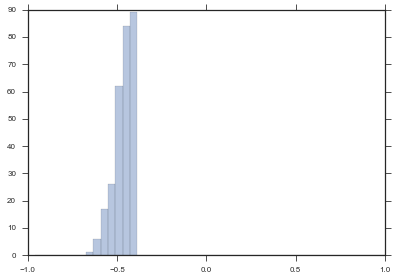

In [188]:
sns.distplot(negatively_correlated, bins=np.linspace(-1, 1, 50), kde=False)

In [189]:
negatively_correlated.name = 'Pearson $R$'

In [190]:
negatively_correlated_df = negatively_correlated.to_frame()
# negatively_correlated_df = negatively_correlated_df.rename
negatively_correlated.head()

ENSG00000006638   -0.454397
ENSG00000009765   -0.401699
ENSG00000013293   -0.418603
ENSG00000015592   -0.561552
ENSG00000023287   -0.419989
Name: Pearson $R$, dtype: float64

In [191]:
negatively_correlated_df = negatively_correlated_df.join(study.expression.feature_data.gene_name)
negatively_correlated_df.head()

,Pearson $R$,gene_name
ENSG00000006638,-0.454397,TBXA2R
ENSG00000009765,-0.401699,IYD
ENSG00000013293,-0.418603,SLC7A14
ENSG00000015592,-0.561552,STMN4
ENSG00000023287,-0.419989,RB1CC1


In [192]:
negatively_correlated_df = negatively_correlated_df.join(study.expression.feature_data.gerstberger2014_rbp_target_mrna)
negatively_correlated_df.head()

,Pearson $R$,gene_name,gerstberger2014_rbp_target_mrna
ENSG00000006638,-0.454397,TBXA2R,False
ENSG00000009765,-0.401699,IYD,False
ENSG00000013293,-0.418603,SLC7A14,False
ENSG00000015592,-0.561552,STMN4,False
ENSG00000023287,-0.419989,RB1CC1,False


In [193]:
negatively_correlated_df.loc[negatively_correlated_df.gerstberger2014_rbp_target_mrna]

,Pearson $R$,gene_name,gerstberger2014_rbp_target_mrna
ENSG00000070047,-0.434315,PHRF1,True
ENSG00000078328,-0.508093,RBFOX1,True
ENSG00000100320,-0.430090,RBFOX2,True
ENSG00000113742,-0.462718,CPEB4,True
ENSG00000119718,-0.409308,EIF2B2,True
ENSG00000156976,-0.461731,EIF4A2,True
ENSG00000161082,-0.439525,CELF5,True
ENSG00000162374,-0.480767,ELAVL4,True
ENSG00000173681,-0.448706,CXorf23,True


In [194]:
go = study.go_enrichment(negatively_correlated.index, smarce1_gene_correls.index)
go.head()

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0043005,"ENSG00000092964,ENSG00000104722,ENSG0000013287...","DPYSL2,NEFM,SYT4,GNAO1,HSP90AA1,ACOT7,NDUFS7,D...",cellular_component,neuron projection,133,13,196,1.059221e-07,0.000020
GO:0008017,"ENSG00000176049,ENSG00000118473,ENSG0000014533...","JAKMIP2,SGIP1,SNCA,REEP1,MAP6,APC,DCX,MAPRE2,M...",molecular_function,microtubule binding,86,10,113,3.476393e-07,0.000065
GO:0030426,"ENSG00000176788,ENSG00000092964,ENSG0000013498...","BASP1,DPYSL2,APC,DPYSL3,MAPT,SNCA,STMN4,STMN2",cellular_component,growth cone,66,8,83,2.387571e-06,0.000449
GO:0031115,"ENSG00000117632,ENSG00000145335,ENSG00000104435","STMN1,SNCA,STMN2",biological_process,negative regulation of microtubule polymerization,7,3,8,3.284843e-06,0.000618
GO:0015631,"ENSG00000117632,ENSG00000078018,ENSG0000015971...","STMN1,MAP2,TPPP3,SGIP1,MAPT",molecular_function,tubulin binding,25,5,32,3.995962e-06,0.000751


In [195]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

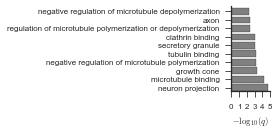

In [196]:
fig, ax = plt.subplots(figsize=(4, 2))
plot_go_enrichment('bonferonni_corrected_p_value', go, color='grey')
fig.tight_layout()
fig.savefig('{}/smarce1_splicing_negatively_correlated_gene_expression_go_enrichment.pdf'.format(figure_folder))

In [197]:
smarce1.index

Index([u'CVN_01', u'CVN_02', u'CVN_05', u'CVN_06', u'CVN_07', u'CVN_08',
       u'CVN_09', u'CVN_11', u'CVN_12', u'CVN_13',
       ...
       u'P8_01', u'P8_02', u'P8_05', u'P8_06', u'P8_10', u'P8_11', u'P9_01',
       u'P9_02', u'P9_03', u'P9_04'],
      dtype='object', length=160)

In [198]:
rbfox1_ensembl = 'ENSG00000078328'
rbfox1 = study.expression.data[rbfox1_ensembl]
# rbfox1 = rbfox1[rbfox1 > 1].dropna()
six.print_('rbfox1.shape', rbfox1.shape)

# data, rbfox1 = study.splicing.data.align(rbfox1, axis=0, join='inner')
data = study.splicing.data.loc[smarce1.index].dropna(thresh=20, axis=1)
data, rbfox1 = data.align(rbfox1, axis=0, join='inner')
six.print_('rbfox1.shape', rbfox1.shape)
six.print_('data.shape', data.shape)
data = data.dropna(how='all', axis=0).dropna(thresh=20, axis=1)
six.print_('data.shape', data.shape)

rbfox1.shape (214,)
rbfox1.shape (160,)
data.shape (160, 11558)
data.shape (160, 11558)


In [199]:
rbfox1_correls = data.corrwith(rbfox1)
rbfox1_correls.head()

exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-         NaN
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-   -0.001328
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-    0.131311
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+   -0.087420
exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515891:+    0.012728
dtype: float64

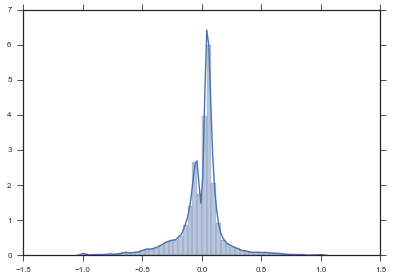

In [200]:
sns.distplot(rbfox1_correls.dropna())

In [201]:
rbfox1_correls = rbfox1_correls.sort_values()

In [202]:
rbfox1_correls[snap25_event]

-0.42788011568531936

In [203]:
correlated_with_rbfox1 = rbfox1_correls[rbfox1_correls.abs() > 0.4]
correlated_with_rbfox1.name = 'Pearson $R$'
correlated_with_rbfox1

exon:chr1:110557385-110557479:+@exon:chr1:110558047-110558153:+@exon:chr1:110558966-110559082:+                                   -1.000000
exon:chr12:104359681-104359838:+@exon:chr12:104373609-104373850:+@exon:chr12:104374671-104374740:+                                -1.000000
exon:chr8:141803453-141803483:-@exon:chr8:141799573-141799625:-@exon:chr8:141774333-141774389:-                                   -1.000000
exon:chr1:169768060-169768099:+@exon:chr1:169770024-169770112:+@exon:chr1:169771762-169771866:+                                   -1.000000
exon:chr17:37006615-37006728:-@exon:chr17:37006370-37006467:-@exon:chr17:37004118-37004292:-                                      -1.000000
exon:chr9:88957990-88958038:-@exon:chr9:88955917-88955968:-@exon:chr9:88954951-88955020:-                                         -1.000000
exon:chr16:8891769-8891805:+@exon:chr16:8895656-8895767:+@exon:chr16:8898624-8898700:+                                            -1.000000
exon:chr18:56615416-

In [204]:
correlated_with_rbfox1_df = correlated_with_rbfox1.to_frame()
correlated_with_rbfox1_df = correlated_with_rbfox1_df.join(study.splicing.feature_data.gene_name)
correlated_with_rbfox1_df = correlated_with_rbfox1_df.join(study.splicing.feature_data.one_ensembl_id)
correlated_with_rbfox1_df

,Pearson $R$,gene_name,one_ensembl_id
exon:chr1:110557385-110557479:+@exon:chr1:110558047-110558153:+@exon:chr1:110558966-110559082:+,-1.000000,AHCYL1,ENSG00000168710
exon:chr12:104359681-104359838:+@exon:chr12:104373609-104373850:+@exon:chr12:104374671-104374740:+,-1.000000,TDG,ENSG00000139372
exon:chr8:141803453-141803483:-@exon:chr8:141799573-141799625:-@exon:chr8:141774333-141774389:-,-1.000000,PTK2,ENSG00000169398
exon:chr1:169768060-169768099:+@exon:chr1:169770024-169770112:+@exon:chr1:169771762-169771866:+,-1.000000,C1orf112,ENSG00000000460
exon:chr17:37006615-37006728:-@exon:chr17:37006370-37006467:-@exon:chr17:37004118-37004292:-,-1.000000,RPL23,ENSG00000125691
exon:chr9:88957990-88958038:-@exon:chr9:88955917-88955968:-@exon:chr9:88954951-88955020:-,-1.000000,ZCCHC6,ENSG00000083223
exon:chr16:8891769-8891805:+@exon:chr16:8895656-8895767:+@exon:chr16:8898624-8898700:+,-1.000000,PMM2,ENSG00000140650
exon:chr18:56615416-56615461:+@exon:chr18:56620750-56621031:+@exon:chr18:56646287-56646399:+,-0.999355,ZNF532,ENSG00000074657
exon:chr4:154555344-154555432:+@exon:chr4:154556584-154556723:+@exon:chr4:154557453-154557863:+,-0.999355,KIAA0922,ENSG00000121210
exon:chr3:52018063-52018174:+@exon:chr3:52019223-52019287:+@exon:chr3:52019377-52019481:+,-0.999230,"ABHD14A-ACY1,ACY1",ENSG00000114786


In [205]:
go = study.go_enrichment(correlated_with_rbfox1_df.one_ensembl_id, 
                         study.splicing.feature_data.one_ensembl_id[rbfox1_correls.index], domain='biological_process',
                        p_value_cutoff=1e-2)
go.head()

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0006355,"ENSG00000117751,ENSG00000124151,ENSG0000010091...","PPP1R8,NCOA3,BRMS1L,ZNF566,CHTOP,PHF21A,PFDN5,...",biological_process,"regulation of transcription, DNA-dependent",376,53,2106,6.086990e-10,1.880880e-07
GO:0007010,"ENSG00000196504,ENSG00000138443,ENSG0000014624...","PRPF40A,ABI2,PHIP,LARP4,MAEA,SEMA6A,PRKCI,DST,...",biological_process,cytoskeleton organization,32,13,131,8.463411e-10,2.615194e-07
GO:0008150,"ENSG00000137831,ENSG00000183137,ENSG0000021426...","UACA,CEP57L1,SNURF,RAP1GDS1,SACM1L,MRPS10,N4BP...",biological_process,biological_process,132,26,749,8.483954e-09,2.621542e-06
GO:0016192,"ENSG00000116266,ENSG00000135249,ENSG0000000725...","STXBP3,RINT1,TRAPPC6A,AHI1,PICALM,SFT2D1,COPA,...",biological_process,vesicle-mediated transport,85,20,222,1.179809e-08,3.645610e-06
GO:0016477,"ENSG00000196504,ENSG00000007168,ENSG0000015189...","PRPF40A,PAFAH1B1,GFRA1,FAT1,GSK3B,APC,CCDC88A,...",biological_process,cell migration,33,12,140,1.613102e-08,4.984484e-06


In [206]:
go.shape

(30, 9)

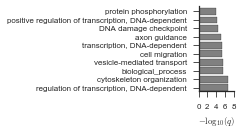

In [207]:
fig, ax = plt.subplots(figsize=(3.5, 2))
plot_go_enrichment(data=go, color='grey')
ax.locator_params('x', nbins=4)
fig.tight_layout()
fig.savefig('{}/rbfox1_expression_correlated_splicing_go_enrichment.pdf'.format(figure_folder))

In [208]:
vlim = -0.05, 1.05

pearson 0.679584503493
spearman 0.633488068965


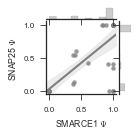

In [209]:
from scipy.stats import pearsonr

ticks = [0, 0.5, 1]

# for event in smarce1_bimodal_events:
y = study.splicing.data[snap25_event]
x = study.splicing.data[smarce1_event]
y.name = 'SNAP25 $\Psi$'
x.name = 'SMARCE1 $\Psi$'
six.print_('pearson', x.corr(y))
six.print_('spearman', x.corr(y, method='spearman'))
g = sns.jointplot(x, y, size=2, kind='reg', stat_func=None, 
                  marginal_kws=dict(kde=False, bins=np.linspace(0, 1, 10)), color='grey')
g.ax_joint.set(xticks=ticks, yticks=ticks, xlim=vlim, ylim=vlim);
g.savefig('{}/smarce1_vs_snap25_jointplot.pdf'.format(figure_folder))

In [210]:
rbfox1_id = study.expression.maybe_renamed_to_feature_id('RBFOX1')[0]
rbfox1_id

'ENSG00000078328'

In [211]:
study.expression.data = np.log2(study.expression.data+1)

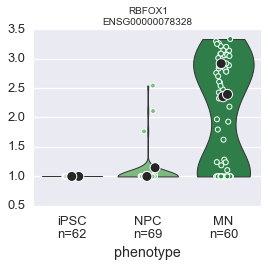

In [212]:
sns.set(context='talk', style='darkgrid')
study.plot_gene("RBFOX1", sample_subset='~outlier')
fig = plt.gcf()
fig.savefig("{}/rbfox1_expression.pdf".format(figure_folder))

In [213]:
sns.set(context='paper', style='ticks')

pearson -0.5599827946
spearman -0.554021448726


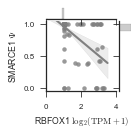

In [224]:
from scipy.stats import pearsonr

ticks = [0, 0.5, 1]

# for event in smarce1_bimodal_events:
y = study.splicing.data[smarce1_event].dropna()
y.name = 'SMARCE1 $\Psi$'

x = study.expression.data[rbfox1_id].dropna()
x.name = 'RBFOX1 $\log_2(\mathrm{TPM}+1)$'


six.print_('pearson', x.corr(y))
six.print_('spearman', x.corr(y, method='spearman'))

x, y = x.align(y)

g = sns.jointplot(x, y, size=2, kind='reg', stat_func=None, 
                  marginal_kws=dict(kde=False, bins=np.linspace(0, 1, 10)), color='grey')
g.ax_joint.set(yticks=ticks, ylim=vlim, xlim=(0, 4), xticks=[0, 2, 4]);
g.savefig('{}/smarce1_splicing_vs_rbfox2_expression_jointplot.pdf'.format(figure_folder))

In [ ]:
from scipy.stats import pearsonr

ticks = [0, 0.5, 1]

# for event in smarce1_bimodal_events:

x = study.expression.data[rbfox1_id].dropna()
# x = x[x > 1].dropna()
x.name = 'RBFOX1 $\log_2(\mathrm{TPM}+1)$'

for event_id, row in correlated_with_rbfox1_df.iterrows():
    y = study.splicing.data[event_id].dropna()
    y.name = '{} $\Psi$'.format(row.gene_name)

    x, y = x.align(y)

    six.print_(row.gene_name)
    six.print_('\tpearson', x.corr(y))
    six.print_('\tspearman', x.corr(y, method='spearman'))


    g = sns.jointplot(x, y, size=2, kind='reg', stat_func=None, 
                      marginal_kws=dict(kde=False, bins=np.linspace(0, 1, 10)), color='grey')
    g.ax_joint.set(yticks=ticks, ylim=vlim, xlim=(0, 10));
    g.savefig('{}/rbfox1_expression_vs_{}_splicing_jointplot.pdf'.format(figure_folder, row.gene_name.lower()))

AHCYL1
	pearson -0.816189419307
	spearman -0.719194952228
TDG
	pearson 0.0462609792908
	spearman -0.497821340399
PTK2
	pearson -1.0
	spearman -1.0
C1orf112
	pearson -1.0
	spearman -1.0
RPL23
	pearson -1.0
	spearman -1.0
ZCCHC6
	pearson -0.547767854288
	spearman -0.521781404473
PMM2
	pearson -0.382799088884
	spearman -0.682012781469
ZNF532
	pearson -0.826675610502
	spearman -0.602625833114
KIAA0922
	pearson -0.781950714015
	spearman -0.603782505643
ABHD14A-ACY1,ACY1
	pearson -0.903620659873
	spearman -0.5
SUV39H2
	pearson -0.996682239685
	spearman -0.603782505643
IPO9
	pearson -0.996173536685
	spearman -0.718795288428
HELLS
	pearson -0.995821410784
	spearman -0.712443511849
CYP20A1
	pearson -0.995815544543
	spearman -0.715891053164
HNRNPM
	pearson -0.607842439257
	spearman -0.604456036148
BCHE
	pearson -0.713695416891
	spearman -0.523123825289
NARG2
	pearson -0.996641022751
	spearman -0.726203040355
METTL9
	pearson -0.720162837801
	spearman -0.718853509045
KRIT1
	pearson -0.985034900201

In [ ]:
from scipy.stats import pearsonr

ticks = [0, 0.5, 1]

# for event in smarce1_bimodal_events:

x = study.expression.data[rbfox1_id].dropna()
x.name = 'RBFOX1 $\log_2(\mathrm{TPM}+1)$'

y = study.splicing.data[snap25_event].dropna()
y.name = 'SNAP25 $\Psi$'


six.print_('pearson', x.corr(y))
six.print_('spearman', x.corr(y, method='spearman'))

x, y = x.align(y)

g = sns.jointplot(x, y, size=2, kind='reg', stat_func=None, 
                  marginal_kws=dict(kde=False, bins=np.linspace(0, 1, 10)), color='grey')
g.ax_joint.set(yticks=ticks, ylim=vlim, xlim=(0, 10));
g.savefig('{}/rbfox1_expression_vs_snap25_splicing_jointplot.pdf'.format(figure_folder))

NameError: name 'vlim' is not defined

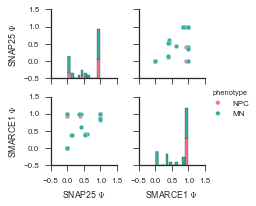

In [121]:

palette = [study.phenotype_to_color[k] for k in df.groupby('phenotype').groups.keys()]

sns.set(style='ticks', context='paper', palette=palette)

# for event in smarce1_bimodal_events:
x = study.splicing.data[snap25_event]
y = study.splicing.data[smarce1_event]
x.name = 'SNAP25 $\Psi$'
y.name = 'SMARCE1 $\Psi$'

df = pd.concat([x, y], axis=1)
df = df.join(study.sample_id_to_phenotype).dropna()

# with sns.color_palette(palette):
g = sns.pairplot(df, hue='phenotype', size=1.5)
# g.map_offdiag(sns.regplot, scatter=False)

for ax in g.axes.flat:
    ax.locator_params(nbins=4)
#     ax.set(xticks=[0, 0.5, 1])
g.set(xlim=vlim, ylim=vlim)
g.savefig('{}/snap25_vs_smarce1_{}_jointgrid.pdf'.format(figure_folder, smarce1_event))

In [ ]:

palette = [study.phenotype_to_color[k] for k in df.groupby('phenotype').groups.keys()]

sns.set(style='ticks', context='paper', palette=palette)

for event in smarce1_bimodal_events:
    x = study.splicing.data[snap25_event]
    y = study.splicing.data[event]
    x.name = 'SNAP25 $\Psi$'
    y.name = 'SMARCE1 $\Psi$'
    
    df = pd.concat([x, y], axis=1)
    df = df.join(study.sample_id_to_phenotype).dropna()

    # with sns.color_palette(palette):
    g = sns.pairplot(df, hue='phenotype', size=1.5)
    g.map_offdiag(sns.regplot, scatter=False)

    for ax in g.axes.flat:
        ax.locator_params(nbins=4)
    #     ax.set(xticks=[0, 0.5, 1])
    g.savefig('{}/snap25_vs_smarce1_{}_jointgrid.pdf'.format(figure_folder, event))

In [13]:
g = sns.FacetGrid(df, hue='phenotype', size=2)
g.map(plt.scatter, 'SMARCE1 $\Psi$', 'SNAP25 $\Psi$')
g.map(sns.regplot, 'SMARCE1 $\Psi$', 'SNAP25 $\Psi$')


for ax in g.axes.flat:
    ax.set(xticks=ticks, yticks=ticks)
g.savefig('{}/snap25_vs_smarce1_{}_scatter'.format(figure_folder, event))

NameError: name 'df' is not defined

In [47]:
l1cam_ensembl = study.expression.maybe_renamed_to_feature_id("L1CAM")[0]
rbfox1_ensembl = study.expression.maybe_renamed_to_feature_id("RBFOX1")[0]
l1cam_ensembl

ensembl_ids = dict(RBFOX1=rbfox1_ensembl, L1CAM=l1cam_ensembl)
ensembl_ids

{'L1CAM': 'ENSG00000198910', 'RBFOX1': 'ENSG00000078328'}

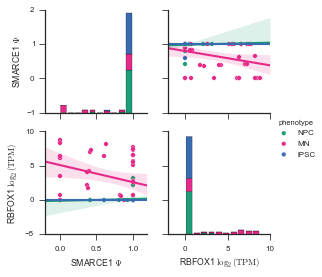

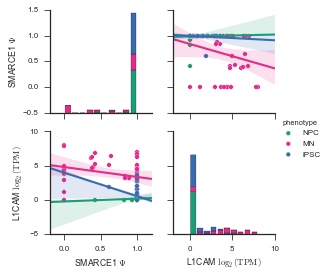

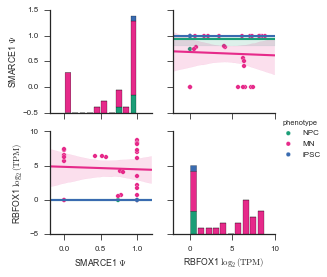

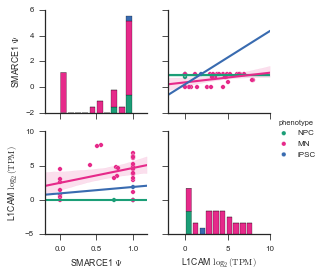

In [55]:



for event in smarce1_bimodal_events:
    for gene_name, ensembl_id in ensembl_ids.items():
        x = study.splicing.data[event]
        y = study.expression.data[ensembl_id]
        x.name = 'SMARCE1 $\Psi$'
        
        # Use string concatenation instead of formatting because latex formatting is annoying
        y.name = gene_name + ' $\log_2(\mathrm{TPM})$'

        df = pd.concat([x, y], axis=1)
        df = df.join(study.sample_id_to_phenotype).dropna()
        
        palette = [study.phenotype_to_color[k] for k in df.groupby('phenotype').groups.keys()]
        sns.set(style='ticks', context='paper', palette=palette)


        # with sns.color_palette(palette):
        g = sns.pairplot(df, hue='phenotype', size=2)
        g.map_offdiag(sns.regplot, scatter=False)

        for ax in g.axes.flat:
            ax.locator_params(nbins=4)
        #     ax.set(xticks=[0, 0.5, 1])
        g.savefig('{}/smarce1_vs_{}_{}_jointgrid.pdf'.format(figure_folder, gene_name, event))

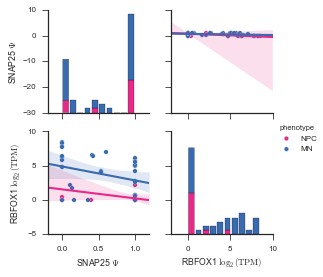

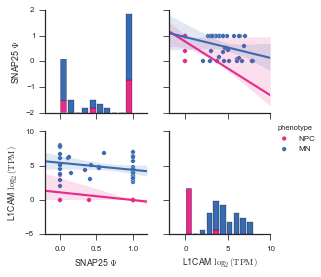

In [54]:
event = snap25_event

for gene_name, ensembl_id in ensembl_ids.items():
    x = study.splicing.data[event]
    y = study.expression.data[ensembl_id]
    x.name = 'SNAP25 $\Psi$'

    # Use string concatenation instead of formatting because latex formatting is annoying
    y.name = gene_name + ' $\log_2(\mathrm{TPM})$'

    df = pd.concat([x, y], axis=1)
    df = df.join(study.sample_id_to_phenotype).dropna()

    palette = [study.phenotype_to_color[k] for k in df.groupby('phenotype').groups.keys()]
    sns.set(style='ticks', context='paper', palette=palette)


    # with sns.color_palette(palette):
    g = sns.pairplot(df, hue='phenotype', size=2)
    g.map_offdiag(sns.regplot, scatter=False)

    for ax in g.axes.flat:
        ax.locator_params(nbins=4)
    #     ax.set(xticks=[0, 0.5, 1])
    g.savefig('{}/snap25_vs_{}_{}_jointgrid.pdf'.format(figure_folder, gene_name, event))

In [170]:
smarce1_bimodal_event = smarce1_bimodal_events.iloc[0]

In [171]:
psi.shape

(181, 11767)

In [189]:
smarce1 = psi[smarce1_bimodal_event].dropna()
print smarce1.shape
psi_for_corr, smarce1 = psi.align(smarce1, axis=0, join='inner')
print psi_for_corr.shape, smarce1.shape

(140,)
(140, 11767) (140,)


In [190]:
psi_for_corr = psi_for_corr.dropna(how='all', axis=0)
psi_for_corr = psi_for_corr.dropna(thresh=20, axis=1)
psi_for_corr.shape

(140, 10528)

In [191]:
(psi_for_corr.isnull().sum() == 140).sum()

0

In [192]:
range(3)

[0, 1, 2]

In [193]:
study.splicing.data.shape

(204, 11767)

In [194]:
%time correlated = psi_for_corr.corr()

CPU times: user 1min 21s, sys: 159 ms, total: 1min 21s
Wall time: 1min 21s


In [195]:
correlated.head()

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515891:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003529:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020785:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,...,exon:chrY:15027542-15027686:+@exon:chrY:15027795-15027939:+@exon:chrY:15028173-15028354:+,exon:chrY:15028429-15028546:+@exon:chrY:15028819-15028972:+@exon:chrY:15029315-15029454:+,exon:chrY:15560897-15560946:-@exon:chrY:15526615-15526673:-@exon:chrY:15522873-15522993:-,exon:chrY:15591134-15591197:-@exon:chrY:15582001-15582109:-@exon:chrY:15560897-15560946:-,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722771-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2735309:+
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,1.000000,-0.072906,-0.139791,NaN,NaN,NaN,NaN,-0.118147,-0.055556,-0.028234,...,NaN,NaN,NaN,NaN,-0.044478,NaN,-0.022405,NaN,NaN,NaN
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,-0.072906,1.000000,0.394529,NaN,-0.108528,-0.092682,-0.138867,0.050253,-0.171042,0.369962,...,NaN,NaN,NaN,NaN,0.107668,NaN,-0.046169,NaN,NaN,NaN
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,-0.139791,0.394529,1.000000,-0.319498,-0.084203,NaN,-0.158803,-0.216551,0.124989,0.387120,...,NaN,NaN,NaN,0.435899,-0.110515,NaN,NaN,NaN,0.24413,-0.089615
exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515891:+,NaN,NaN,-0.319498,1.000000,-0.111111,NaN,1.000000,NaN,NaN,-0.058321,...,NaN,NaN,NaN,NaN,-0.072545,NaN,NaN,NaN,NaN,NaN
exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,NaN,-0.108528,-0.084203,-0.111111,1.000000,NaN,0.641014,-0.115201,-0.064194,-0.057145,...,-0.04,NaN,NaN,NaN,-0.061190,NaN,-0.034917,NaN,-0.03399,-0.033990


In [196]:
smarce1_correls = correlated[smarce1_bimodal_event].dropna()

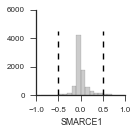

In [197]:
fig, ax = plt.subplots(figsize=(2,2))
sns.distplot(smarce1_correls, kde=False, bins=20, color='grey')
ax.set(xlabel='SMARCE1', xlim=(-1, 1))

cutoff = 0.5 #2*smarce1_correls.std()
ymin, ymax = ax.get_ylim()
ax.vlines(cutoff, ymin, ymax, color='k', linestyle='dashed')
ax.vlines(-cutoff, ymin, ymax, color='k', linestyle='dashed')
ax.locator_params(nbins=4)
sns.despine()
fig.tight_layout()

In [198]:
smarce1_correlated = smarce1_correls.index[smarce1_correls.abs() > cutoff]
len(smarce1_correlated)

332

In [199]:
smarce1_correlated_psi = psi_for_corr[smarce1_correlated]
print smarce1_correlated_psi.shape
smarce1_correlated_psi.head()

(140, 332)


,exon:chr10:102003455-102003529:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:103360960-103361093:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+,exon:chr10:122649407-122649521:+@exon:chr10:122650228-122650399:+@exon:chr10:122659541-122659649:+,exon:chr10:123719873-123719921:-@exon:chr10:123719016-123719110:-@exon:chr10:123718839-123718925:-,exon:chr10:14920862-14920918:+@exon:chr10:14923499-14923644:+@exon:chr10:14938845-14939516:+@exon:chr10:14941538-14941684:+,exon:chr10:43312766-43312942:+@exon:chr10:43315684-43315872:+@exon:chr10:43315956-43316136:+,exon:chr10:75156277-75156341:-@exon:chr10:75155802-75155867:-@exon:chr10:75148070-75148172:-,exon:chr10:96097534-96097631:-@exon:chr10:96094391-96094475:-@exon:chr10:96092983-96094062:-,exon:chr11:107219663-107219779:-@exon:chr11:107216140-107216216:-@exon:chr11:107207284-107207439:-,exon:chr11:113746167-113746218:-@exon:chr11:113724980-113725057:-@exon:chr11:113723249-113723355:-,...,exon:chrX:118986736-118986961:-@exon:chrX:118985730-118985836:-@exon:chrX:118985458-118985564:-,exon:chrX:129299525-129299853:-@exon:chrX:129290435-129290577:-@exon:chrX:129289131-129289261:-@exon:chrX:129283444-129283543:-,exon:chrX:129473932-129473950:+@exon:chrX:129474081-129474327:+@exon:chrX:129479156-129479249:+,exon:chrX:138820075-138820228:-@exon:chrX:138814594-138814684:-@exon:chrX:138813810-138813914:-@exon:chrX:138808505-138811121:-,exon:chrX:138820075-138820228:-@exon:chrX:138819890-138819955:-@exon:chrX:138813810-138813914:-@exon:chrX:138808505-138811121:-,exon:chrX:154300602-154300618:+@exon:chrX:154301652-154301706:+@exon:chrX:154305445-154305564:+,exon:chrX:23761242-23761367:-@exon:chrX:23754036-23754133:-@exon:chrX:23751289-23751334:-,exon:chrX:24190873-24190917:+@exon:chrX:24191724-24191840:+@exon:chrX:24197300-24197667:+,exon:chrX:69625678-69625755:+@exon:chrX:69626109-69626204:+@exon:chrX:69626743-69626925:+,exon:chrX:85282495-85282561:-@exon:chrX:85236741-85236813:-@exon:chrX:85233771-85233895:-
CVN_01,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
CVN_02,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
CVN_05,NaN,1,NaN,NaN,0,NaN,NaN,NaN,0,NaN,...,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,1
CVN_06,NaN,1,NaN,1,NaN,NaN,0,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN
CVN_07,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,...,1,NaN,NaN,0,0,NaN,NaN,NaN,1,NaN


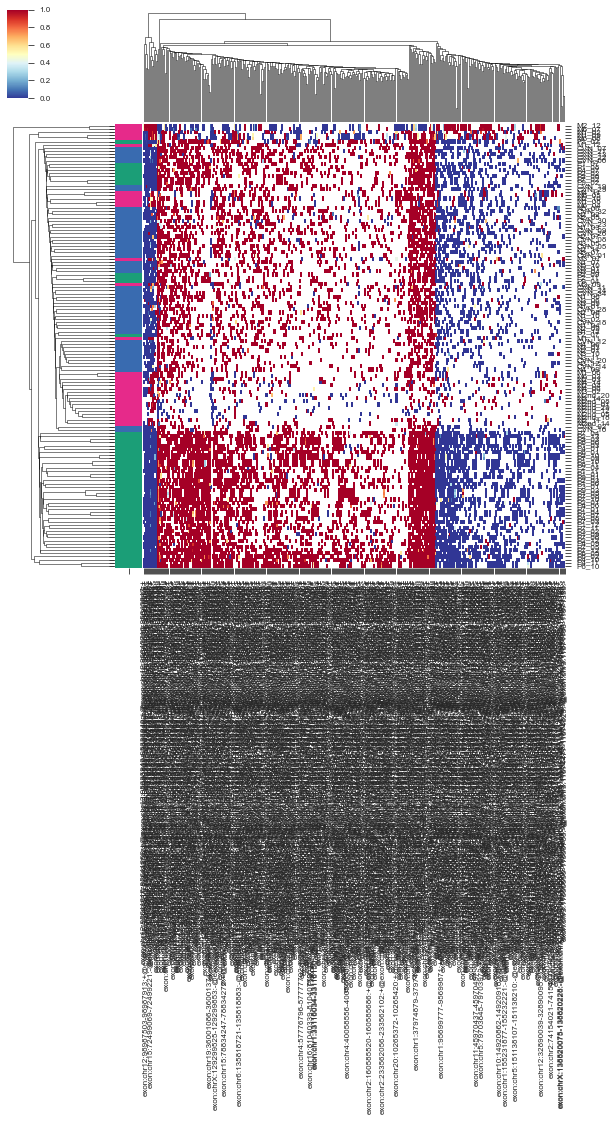

In [184]:
data = smarce1_correlated_psi
mask = smarce1_correlated_psi.isnull()
data = data.fillna(0.5)

sample_colors = study.sample_id_to_color[data.index]

g = sns.clustermap(data, mask=mask, center=0.5, cmap='RdYlBu_r', row_colors=sample_colors)